In [2]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [3]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [4]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [5]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

disgust completed
happy completed
sad completed
neutral completed
fear completed
angry completed
surprise completed


In [6]:
print(train)

                             image     label
0    images/train/disgust/2795.jpg   disgust
1    images/train/disgust/4969.jpg   disgust
2    images/train/disgust/1777.jpg   disgust
3     images/train/disgust/299.jpg   disgust
4    images/train/disgust/2419.jpg   disgust
..                             ...       ...
485  images/train/surprise/304.jpg  surprise
486  images/train/surprise/528.jpg  surprise
487  images/train/surprise/480.jpg  surprise
488  images/train/surprise/529.jpg  surprise
489   images/train/surprise/88.jpg  surprise

[490 rows x 2 columns]


In [7]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

disgust completed
happy completed
sad completed
neutral completed
fear completed
angry completed
surprise completed


In [8]:
print(test)
print(test['image'])

                            image     label
0    images/test/disgust/2795.jpg   disgust
1    images/test/disgust/4969.jpg   disgust
2    images/test/disgust/1777.jpg   disgust
3     images/test/disgust/299.jpg   disgust
4    images/test/disgust/2419.jpg   disgust
..                            ...       ...
485  images/test/surprise/304.jpg  surprise
486  images/test/surprise/528.jpg  surprise
487  images/test/surprise/480.jpg  surprise
488  images/test/surprise/529.jpg  surprise
489   images/test/surprise/88.jpg  surprise

[490 rows x 2 columns]
0      images/test/disgust/2795.jpg
1      images/test/disgust/4969.jpg
2      images/test/disgust/1777.jpg
3       images/test/disgust/299.jpg
4      images/test/disgust/2419.jpg
                   ...             
485    images/test/surprise/304.jpg
486    images/test/surprise/528.jpg
487    images/test/surprise/480.jpg
488    images/test/surprise/529.jpg
489     images/test/surprise/88.jpg
Name: image, Length: 490, dtype: object


In [9]:
from tqdm.notebook import tqdm

In [10]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,color_mode="grayscale")
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features
    

In [11]:
train_features = extract_features(train['image']) 

  0%|          | 0/490 [00:00<?, ?it/s]

In [12]:
test_features = extract_features(test['image'])

  0%|          | 0/490 [00:00<?, ?it/s]

In [13]:
x_train = train_features/255.0
x_test = test_features/255.0

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [16]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [17]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [18]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

2024-10-23 19:46:22.015317: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-10-23 19:46:22.015629: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-10-23 19:46:22.015650: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (treesa-latitude-7410): /proc/driver/nvidia/version does not exist
2024-10-23 19:46:22.016367: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

Epoch 1/5


2024-10-23 19:46:28.617481: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 69337088 exceeds 10% of free system memory.


1/8 [==>...........................] - ETA: 9s - loss: 1.9614 - accuracy: 0.1094

2024-10-23 19:46:29.291587: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 69337088 exceeds 10% of free system memory.
2024-10-23 19:46:29.353737: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 69337088 exceeds 10% of free system memory.


2/8 [======>.......................] - ETA: 4s - loss: 1.9754 - accuracy: 0.1250

2024-10-23 19:46:30.065016: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 69337088 exceeds 10% of free system memory.
2024-10-23 19:46:30.121099: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 69337088 exceeds 10% of free system memory.


8/8 [==============================] - 7s 801ms/step - loss: 1.9961 - accuracy: 0.1429 - val_loss: 1.9460 - val_accuracy: 0.1429
Epoch 2/5
8/8 [==============================] - 6s 749ms/step - loss: 1.9467 - accuracy: 0.1612 - val_loss: 1.9460 - val_accuracy: 0.1429
Epoch 3/5
8/8 [==============================] - 6s 750ms/step - loss: 1.9454 - accuracy: 0.1633 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 4/5
8/8 [==============================] - 6s 746ms/step - loss: 1.9480 - accuracy: 0.1429 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 5/5
8/8 [==============================] - 6s 754ms/step - loss: 1.9461 - accuracy: 0.1449 - val_loss: 1.9459 - val_accuracy: 0.1429


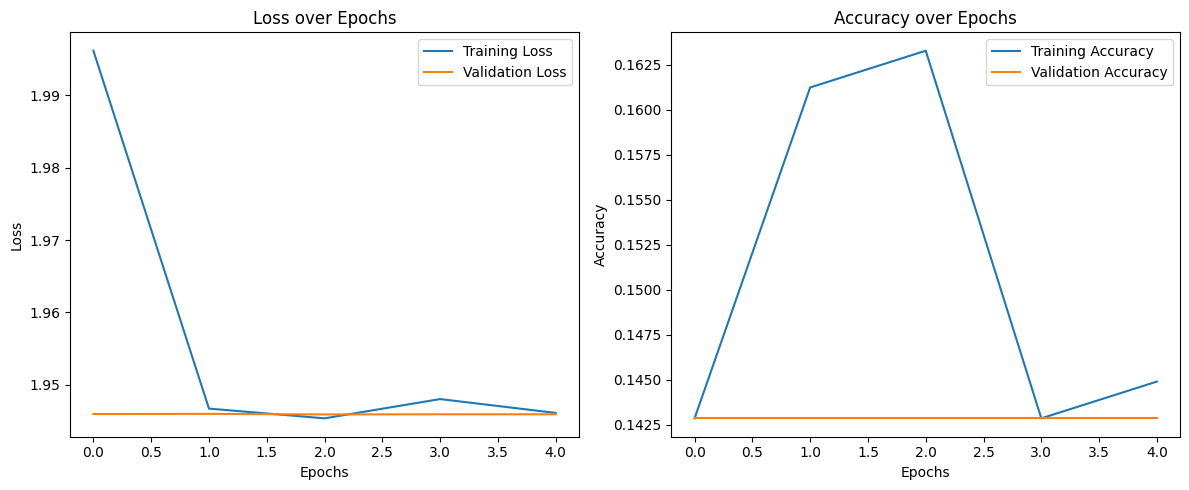

In [20]:
history = model.fit(x_train, y_train, batch_size = 64, epochs = 100, validation_data=(x_test,y_test))
# Training and validation loss and accuracy
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


16/16 [==============================] - 1s 53ms/step


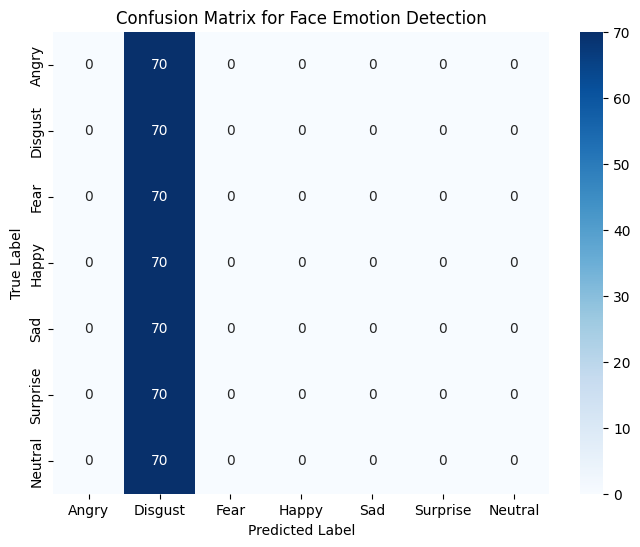

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test data
y_pred = model.predict(x_test)
y_true = y_test

if len(y_true.shape) > 1 and y_true.shape[1] > 1:
    y_true = np.argmax(y_true, axis=1)
    
 # Assuming model output is one-hot encoded
y_pred_classes = y_pred

if len(y_pred_classes.shape) > 1 and y_pred_classes.shape[1] > 1:
    y_pred_classes = np.argmax(y_pred_classes, axis=1)   

cm = confusion_matrix(y_true, y_pred_classes)

# Define class names for the emotions
class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Face Emotion Detection')
plt.show()

16/16 [==============================] - 1s 51ms/step


/home/tressa/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


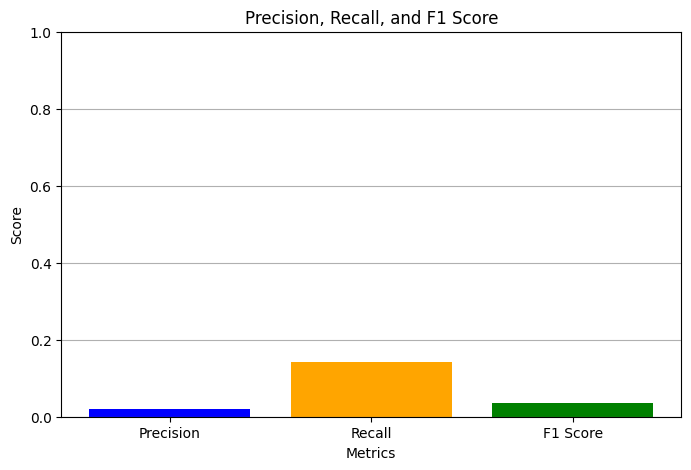

Precision: 0.02040816326530612
Recall: 0.14285714285714285
F1 Score: 0.03571428571428571


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Example true labels and predicted labels
# Assuming y_test contains the true labels
from sklearn.metrics import precision_score, recall_score, f1_score

# Ensure y_true and y_pred are in the correct form
y_true = y_test.argmax(axis=1)  # If y_test is one-hot encoded
y_pred = model.predict(x_test).argmax(axis=1)  # Convert predicted probabilities to class labels

# Calculate metrics
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Calculate precision, recall, and F1 score
#precision = precision_score(y_true, y_pred)
#recall = recall_score(y_true, y_pred)
#f1 = f1_score(y_true, y_pred)

# Data for plotting
metrics = ['Precision', 'Recall', 'F1 Score']
scores = [precision, recall, f1]

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(metrics, scores, color=['blue', 'orange', 'green'])
plt.ylim(0, 1)  # Set y-axis limits
plt.title('Precision, Recall, and F1 Score')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.grid(axis='y')

# Show the plot
plt.show()

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

In [23]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [24]:
from keras.models import model_from_json

In [25]:
json_file = open("facialemotionmodel.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("facialemotionmodel.h5")

In [26]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [27]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [28]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 [==============================] - 0s 82ms/step
model prediction is  sad


/home/tressa/.local/lib/python3.10/site-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of neutral
1/1 [==============================] - 0s 43ms/step
model prediction is  neutral


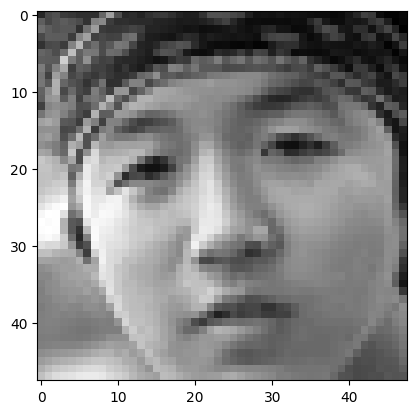

In [30]:
image = 'images/train/neutral/11.jpg'
print("original image is of neutral")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of angry
1/1 [==============================] - 0s 27ms/step
model prediction is  angry


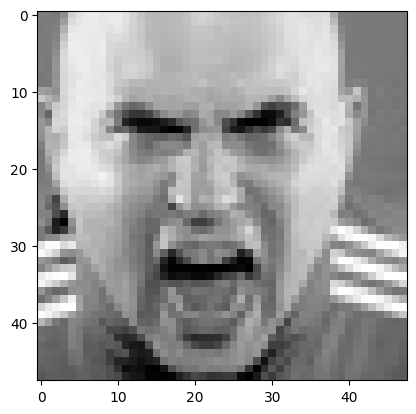

In [31]:
image = 'images/train/angry/22.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of sad
1/1 [==============================] - 0s 26ms/step
model prediction is  sad


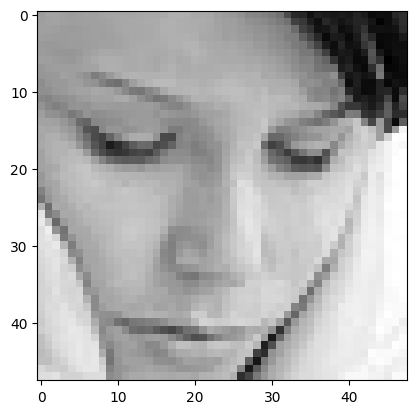

In [32]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 [==============================] - 0s 35ms/step
model prediction is  sad


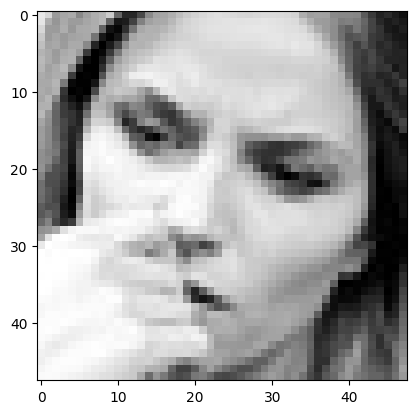

In [33]:
image = 'images/train/fear/2.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 [==============================] - 0s 24ms/step
model prediction is  disgust


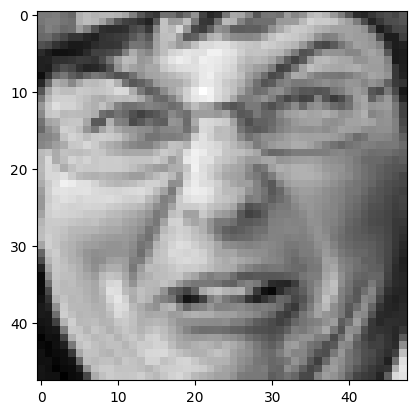

In [34]:
image = 'images/train/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 [==============================] - 0s 28ms/step
model prediction is  happy


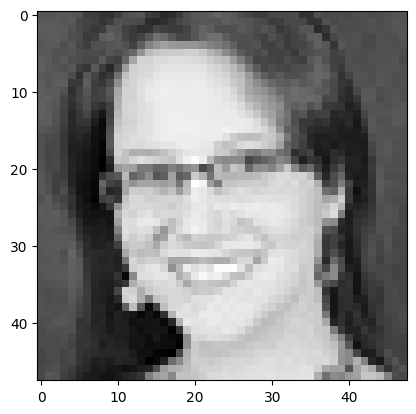

In [35]:
image = 'images/train/happy/7.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 [==============================] - 0s 24ms/step
model prediction is  surprise


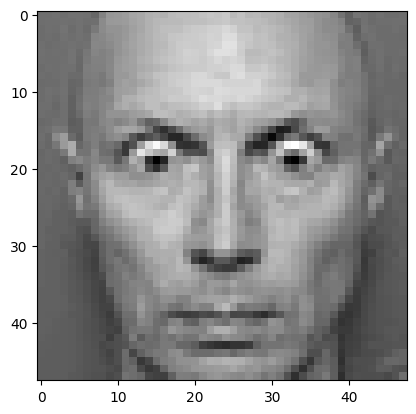

In [36]:
image = 'images/train/surprise/15.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')